Durante a aula, você aprendeu a utilizar gráficos de pizza e gráficos de barra para visualizar proporções entre categorias, permitindo comparar partes com o todo. Agora, é hora de exercitar o que você aprendeu!

Nesta oficina, você deve continuar a analisar os dados de vendas de videogames. Portanto, crie um Jupyter Notebook e responda cada questão com código em uma célula.

1. Importe as bibliotecas pandas e matplotlib, usando a palavra mágica inline para exibir as visualizações no notebook; e carregue os dados, que estão disponibilizados neste link:dados, em um DataFrame. Assim, você pode carregar os dados pela URI ou salvar em sua máquina e carregá-los localmente;

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
games_uri = 'https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro04/oficina/arquivos/dadosoficina04.txt'
games = pd.read_table(games_uri, sep=',')
games.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


2. Crie uma visualização que mostre a proporção de vendas global entre gêneros de jogos da empresa Nintendo;

In [13]:
games_nintendo = games[games['Publisher'] == 'Nintendo']
games_nintendo.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [27]:
nintendo_generos = games_nintendo.groupby(by='Genre').sum()
nintendo_generos

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,359543,156516.0,63.49,29.02,29.24,6.48,128.18
Adventure,193705,70161.0,17.72,7.66,9.01,1.28,35.71
Fighting,47056,36031.0,27.10,8.64,14.94,2.65,53.35
Misc,523309,200625.0,61.98,51.62,55.25,11.78,180.67
Platform,245890,222146.0,220.14,85.21,102.36,19.47,427.21
Puzzle,327830,148134.0,55.74,26.42,37.09,5.53,124.88
Racing,82066,73967.0,73.55,39.75,29.22,8.81,151.30
Role-Playing,374106,210720.0,105.63,63.92,102.24,13.07,284.90
Shooter,98683,48030.0,51.39,9.85,6.07,2.39,69.73


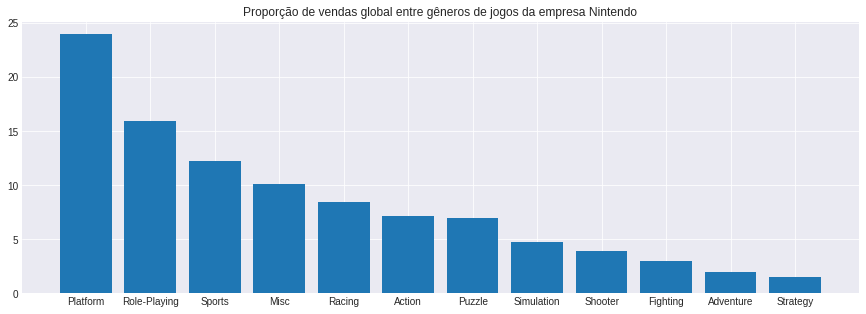

In [15]:
generos = nintendo_generos.sort_values(by='Global_Sales',ascending=False)
porcentagens = generos['Global_Sales']*100.0/generos['Global_Sales'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(generos.index,porcentagens)
plt.title('Proporção de vendas global entre gêneros de jogos da empresa Nintendo')
plt.show()

3. Crie uma visualização que mostre a proporção de quantidade de jogos por plataforma a partir do ano de 2015.

In [16]:
games_apos_2015= games[games['Year'] > 2015]
games_apos_2015.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
271,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
351,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61


In [29]:
games_plataforma = games_apos_2015.groupby(by='Platform').count()
games_plataforma

,Rank,Name,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,,
3DS,35,35,35,35,35,35,35,35,35,35
DS,1,1,1,1,1,1,1,1,1,1
PC,38,38,38,38,38,38,38,38,38,38
PS3,32,32,32,32,32,32,32,32,32,32
PS4,108,108,108,108,108,108,108,108,108,108
PSV,62,62,62,62,60,62,62,62,62,62
WiiU,10,10,10,10,10,10,10,10,10,10
X360,8,8,8,8,8,8,8,8,8,8
XOne,54,54,54,54,54,54,54,54,54,54


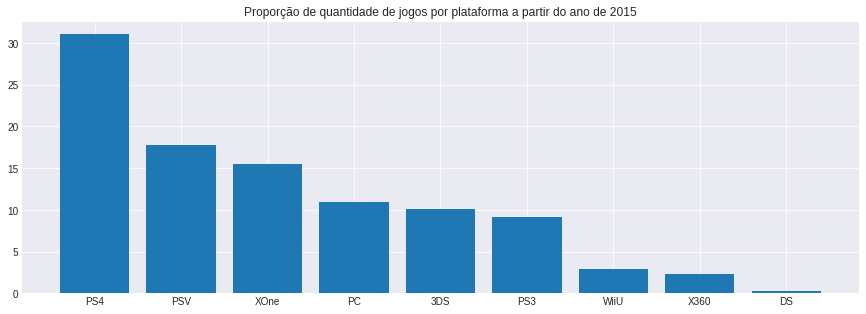

In [32]:
ordenacao = games_plataforma.sort_values(by='Name',ascending=False)
porcentagens = ordenacao['Name']*100.0/ordenacao['Name'].sum()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.bar(ordenacao.index,porcentagens)
plt.title('Proporção de quantidade de jogos por plataforma a partir do ano de 2015')
plt.show()